# Proyek Analisis Data: Bike Sharing Dataset

- **Nama:** Hamas Baja Sahik Al-Jaman
- **Email:** sahik.jaman@gmail.com
- **ID Dicoding:** sahikjaman

## Menentukan Pertanyaan Bisnis

- Bagaimana kondisi cuaca memengaruhi penggunaan sepeda?
- Apakah ada tren waktu tertentu dalam sehari yang menunjukkan lebih banyak peminjaman sepeda?

## Import Semua Packages/Library yang Digunakan

In [2]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [6]:
day_df = pd.read_csv('./data/day.csv')
day_df.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [7]:
hour_df = pd.read_csv('./data/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [8]:
day_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [9]:
day_df.isnull().sum()


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
hour_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [11]:
hour_df.isnull().sum()


instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [12]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0
Jumlah duplikasi:  0


In [13]:
day_df.describe()


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [14]:
hour_df.describe()


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


<function matplotlib.pyplot.show(close=None, block=None)>

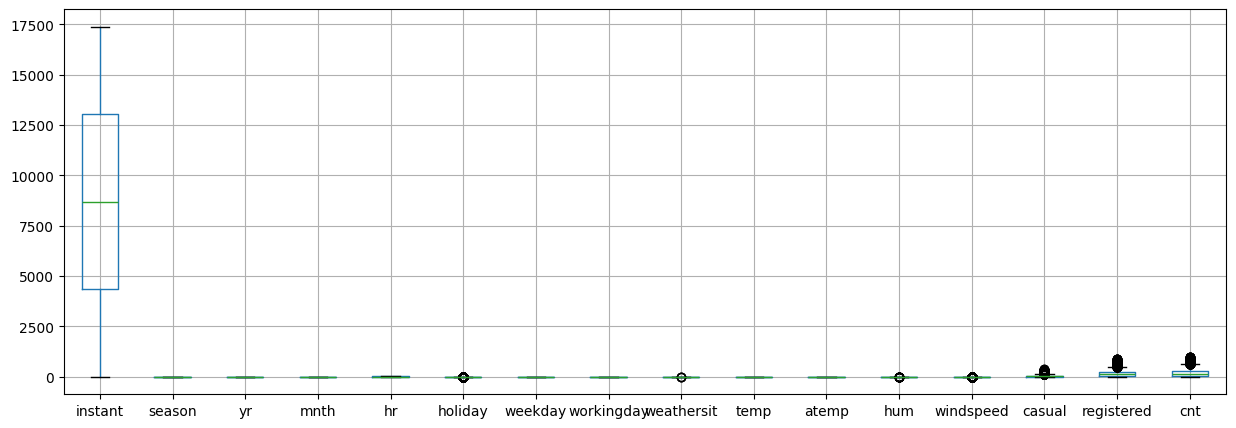

In [15]:
plt.figure(figsize=(15,5))
hour_df.boxplot()
plt.show

<Axes: >

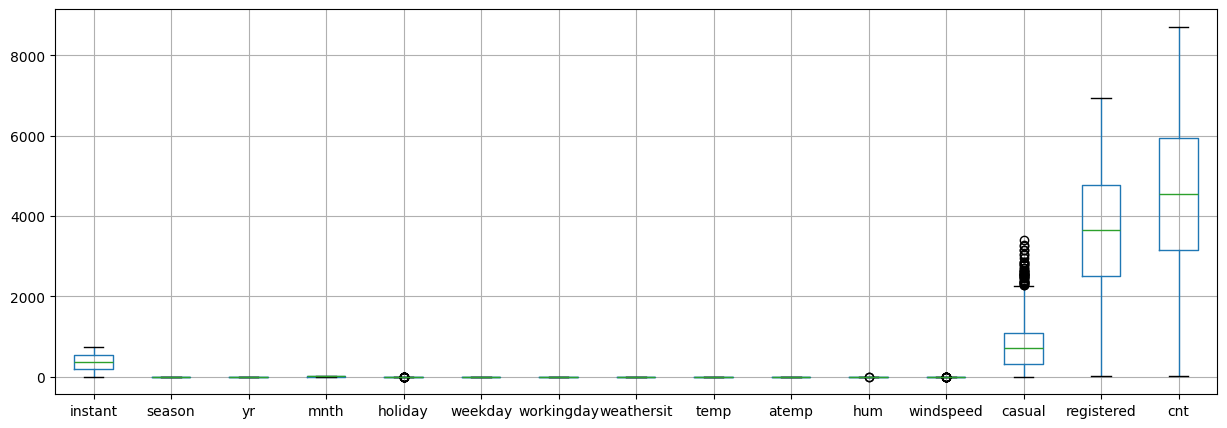

In [16]:
plt.figure(figsize=(15,5))
day_df.boxplot()

**Insight:**
- tidak ada missing values, duplicate data dalam data tersebut
- Kolom casual, registered, windspeed dan cnt memiliki sejumlah besar outlier
- kesalahan tipe data kolom dteday
- ada kolom instant yang tidak dibutuhkan

### Cleaning Data

In [17]:
#Mengubah tipe data pada kolom dteday
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [18]:
#Menghapus kolom instant
hour_df.drop(['instant'], axis = 1, inplace= True)
day_df.drop(['instant'], axis = 1, inplace= True)

## Exploratory Data Analysis (EDA)

### Explore...

In [20]:
# Menampilkan informasi dasar dataset 'day' dan 'hour'
day_df.info()
hour_df.info()

# Menampilkan deskripsi statistik dari dataset 'day' dan 'hour'
day_df.describe(include="all")
hour_df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      731 non-null    datetime64[ns]
 1   season      731 non-null    int64         
 2   yr          731 non-null    int64         
 3   mnth        731 non-null    int64         
 4   holiday     731 non-null    int64         
 5   weekday     731 non-null    int64         
 6   workingday  731 non-null    int64         
 7   weathersit  731 non-null    int64         
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  hum         731 non-null    float64       
 11  windspeed   731 non-null    float64       
 12  casual      731 non-null    int64         
 13  registered  731 non-null    int64         
 14  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(10)
memory usage: 85.8 KB
<class '

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [21]:
# Analisis deskriptif penggunaan sepeda berdasarkan kondisi cuaca (weathersit) di dataset harian
weather_group_day = day_df.groupby('weathersit')['cnt'].describe()

# Analisis deskriptif penggunaan sepeda berdasarkan kondisi cuaca (weathersit) di dataset per jam
weather_group_hour = hour_df.groupby('weathersit')['cnt'].describe()

# Analisis rata-rata jumlah peminjaman sepeda berdasarkan jam dalam sehari pada dataset per jam
hourly_avg_usage = hour_df.groupby('hr')['cnt'].mean().reset_index()
hourly_usage_stats = hour_df.groupby('hr')['cnt'].describe()

# Display the findings
(weather_group_day, weather_group_hour, hourly_avg_usage, hourly_usage_stats)

(            count         mean          std    min     25%     50%     75%  \
 weathersit                                                                   
 1           463.0  4876.786177  1879.483989  431.0  3636.5  4844.0  6458.5   
 2           247.0  4035.862348  1809.109918  605.0  2674.5  4040.0  5257.5   
 3            21.0  1803.285714  1240.284449   22.0   705.0  1817.0  2424.0   
 
                max  
 weathersit          
 1           8714.0  
 2           8362.0  
 3           4639.0  ,
               count        mean         std   min   25%    50%    75%    max
 weathersit                                                                  
 1           11413.0  204.869272  189.487773   1.0  46.0  159.0  304.0  977.0
 2            4544.0  175.165493  165.431589   1.0  40.0  133.0  257.0  957.0
 3            1419.0  111.579281  133.781045   1.0  21.0   63.0  152.5  891.0
 4               3.0   74.333333   77.925178  23.0  29.5   36.0  100.0  164.0,
     hr         cnt
 0 

**Insight awal:**
- Cuaca: Kondisi cuaca yang lebih baik (cerah atau berawan ringan) memiliki dampak positif pada jumlah pengguna sepeda.

- Waktu dalam Sehari: Tren peminjaman sepeda meningkat tajam selama jam sibuk pagi dan sore (sekitar jam 8 pagi dan jam 17-18 sore)

In [22]:
day_df.groupby(by="holiday", observed=False)['cnt'].sum()


holiday
0    3214244
1      78435
Name: cnt, dtype: int64

**Insight awal:**
- Penyewaan sepeda pada hari libur lebih sedikit dari hari biasa/masuk

In [23]:
day_df.groupby(by="yr", observed=False).agg({"registered": ["sum"], "casual": ["sum"]})


,registered,casual
,sum,sum
yr,,
0,995851,247252
1,1676811,372765


**Insight awal:**
- ada selisih yang besar antara yang sudah memiliki member dan yang belum memiliki member.

## Visualization & Explanatory Analysis

### Pertanyaan 1:Bagaimana kondisi cuaca memengaruhi penggunaan sepeda?


C:\Users\lenovo\AppData\Local\Temp\ipykernel_33420\558796284.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=weather_avg, x='weathersit', y='cnt', palette='viridis')


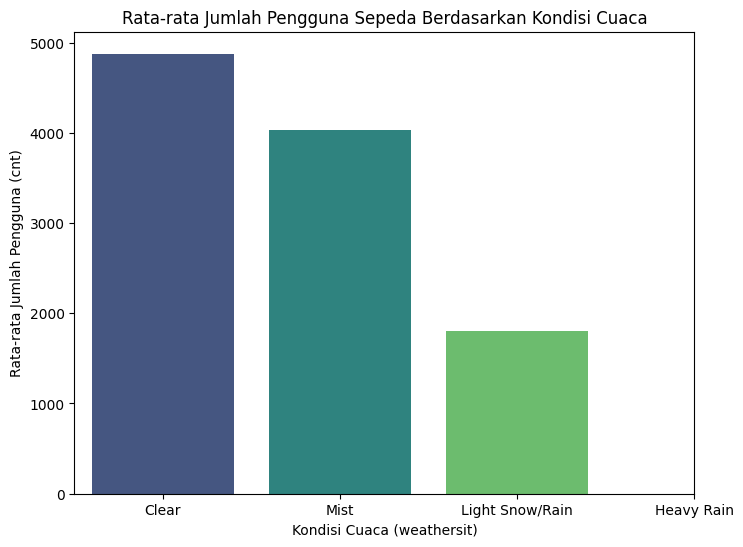

In [24]:
# Visualisasi rata-rata jumlah pengguna sepeda berdasarkan kondisi cuaca
weather_avg = day_df.groupby('weathersit')['cnt'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(data=weather_avg, x='weathersit', y='cnt', palette='viridis')
plt.title('Rata-rata Jumlah Pengguna Sepeda Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca (weathersit)')
plt.ylabel('Rata-rata Jumlah Pengguna (cnt)')
plt.xticks([0, 1, 2, 3], ['Clear', 'Mist', 'Light Snow/Rain', 'Heavy Rain'])
plt.show()


**Insight:**
- Kondisi cuaca cerah (Clear) memiliki jumlah pengguna sepeda tertinggi, menunjukkan bahwa cuaca yang baik sangat memengaruhi penggunaan sepeda.
- Kondisi berkabut atau berawan (Mist) memiliki jumlah pengguna yang lebih sedikit dibandingkan cuaca cerah.
- Jumlah pengguna menurun lebih lanjut saat terjadi hujan ringan atau salju (Light Snow/Rain), dan paling rendah saat terjadi hujan deras (Heavy Rain).

### Pertanyaan 2: Apakah ada tren waktu tertentu dalam sehari yang menunjukkan lebih banyak peminjaman sepeda?

C:\Users\lenovo\AppData\Local\Temp\ipykernel_33420\3115460294.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=hour_df, x='hr', y='cnt', ci=None)


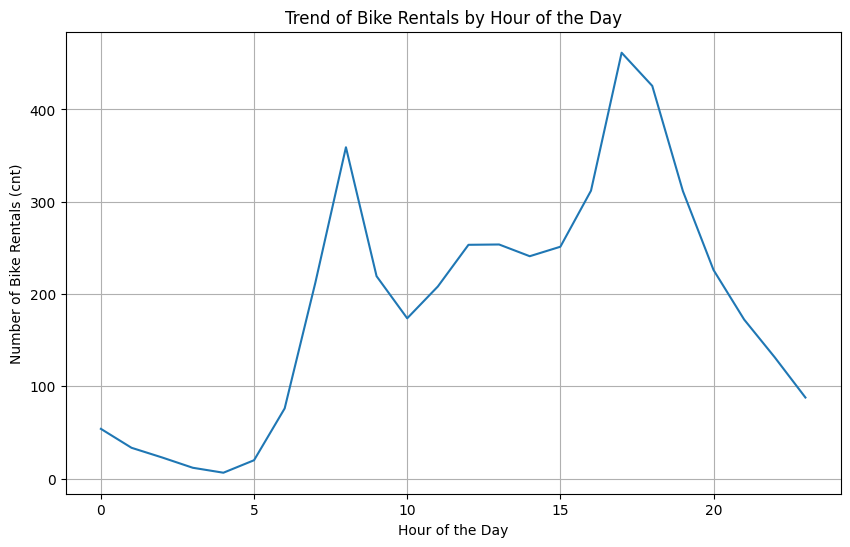

In [29]:
# Visualizing the trend of bike rentals by hour of the day
plt.figure(figsize=(10, 6))
sns.lineplot(data=hour_df, x='hr', y='cnt', ci=None)
plt.title('Trend of Bike Rentals by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Bike Rentals (cnt)')
plt.grid(True)
plt.show()


**Insight:**
- Terlihat bahwa jumlah peminjaman sepeda meningkat tajam selama jam sibuk di pagi hari (sekitar pukul 7-9) dan sore hari (sekitar pukul 17-19), yang mencerminkan waktu berangkat dan pulang kerja. Ini memberikan indikasi bahwa banyak pengguna menggunakan sepeda untuk keperluan perjalanan sehari-hari.
- Penggunaan sepeda menurun pada jam-jam malam dan dini hari (00:00 - 06:00), serta ada penurunan di siang hari setelah jam sibuk pagi.

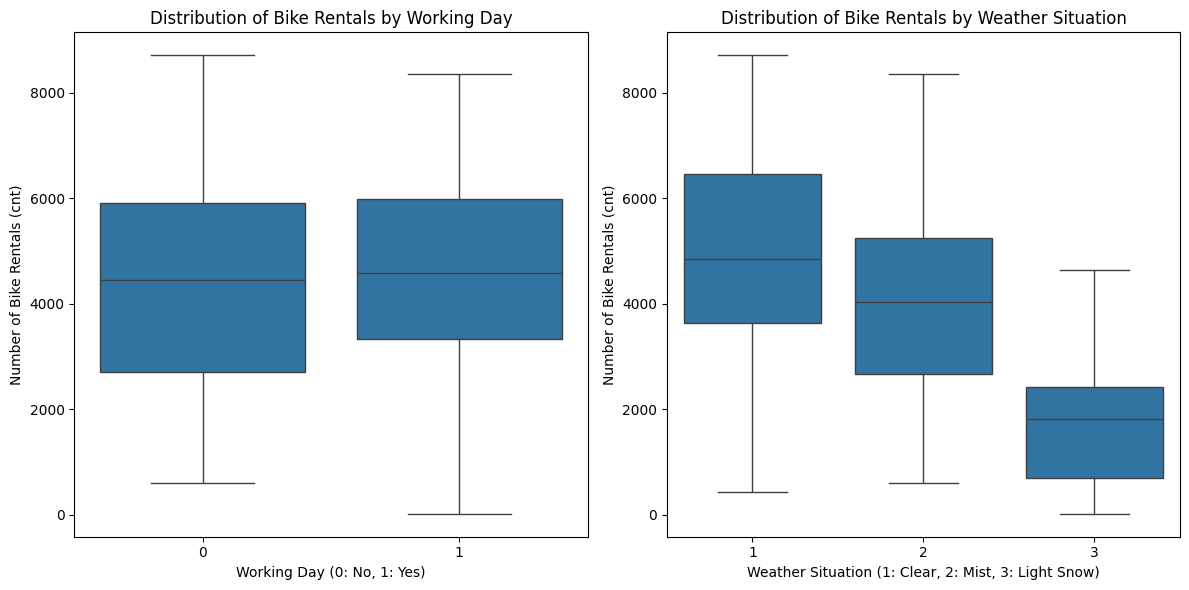

In [31]:
# Visualizing bike rentals distribution by workingday and weathersit

plt.figure(figsize=(12, 6))

# Distribution of bike rentals based on working day
plt.subplot(1, 2, 1)
sns.boxplot(data=day_df, x='workingday', y='cnt')
plt.title('Distribution of Bike Rentals by Working Day')
plt.xlabel('Working Day (0: No, 1: Yes)')
plt.ylabel('Number of Bike Rentals (cnt)')

# Distribution of bike rentals based on weather situation
plt.subplot(1, 2, 2)
sns.boxplot(data=day_df, x='weathersit', y='cnt')
plt.title('Distribution of Bike Rentals by Weather Situation')
plt.xlabel('Weather Situation (1: Clear, 2: Mist, 3: Light Snow)')
plt.ylabel('Number of Bike Rentals (cnt)')

plt.tight_layout()
plt.show()


## Analisis Lanjutan (Opsional)

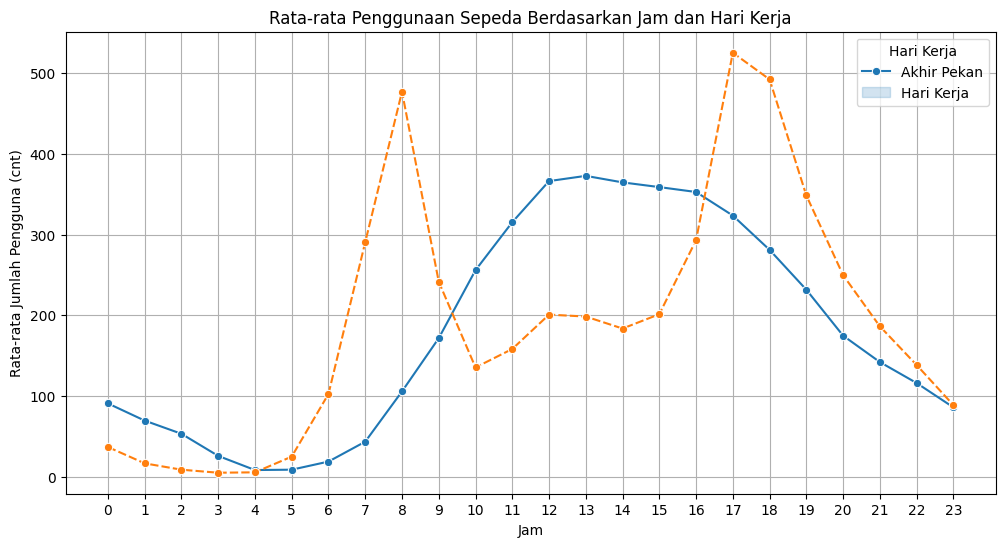

In [32]:
# 1. Segmentasi Penggunaan Sepeda Berdasarkan Hari Kerja dan Akhir Pekan

# Menghitung rata-rata jumlah peminjaman sepeda berdasarkan jam dalam sehari dan apakah itu hari kerja atau tidak
hourly_workingday_avg = hour_df.groupby(['hr', 'workingday'])['cnt'].mean().reset_index()

# Pivot data untuk memudahkan visualisasi
hourly_workingday_pivot = hourly_workingday_avg.pivot(index='hr', columns='workingday', values='cnt')

# Visualisasi pola peminjaman sepeda pada hari kerja vs akhir pekan
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_workingday_pivot, marker='o')
plt.title('Rata-rata Penggunaan Sepeda Berdasarkan Jam dan Hari Kerja')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Jumlah Pengguna (cnt)')
plt.xticks(range(0, 24))
plt.legend(title='Hari Kerja', labels=['Akhir Pekan', 'Hari Kerja'])
plt.grid(True)
plt.show()


**Insight:**
- Pada hari kerja, terdapat dua puncak penggunaan yang sangat jelas: pagi hari sekitar jam 8 dan sore hari sekitar jam 17-18. Ini menunjukkan bahwa peminjaman sepeda terutama digunakan untuk perjalanan komuter.
- Pada akhir pekan, pola penggunaannya berbeda; tidak ada puncak penggunaan yang signifikan di pagi atau sore hari. Tren penggunaan lebih merata sepanjang siang dan sore hari (sekitar jam 11-16).
- Penggunaan sepeda pada akhir pekan lebih tinggi pada siang hari dibandingkan pagi atau sore, kemungkinan karena pengguna menggunakannya untuk aktivitas rekreasi atau perjalanan santai.

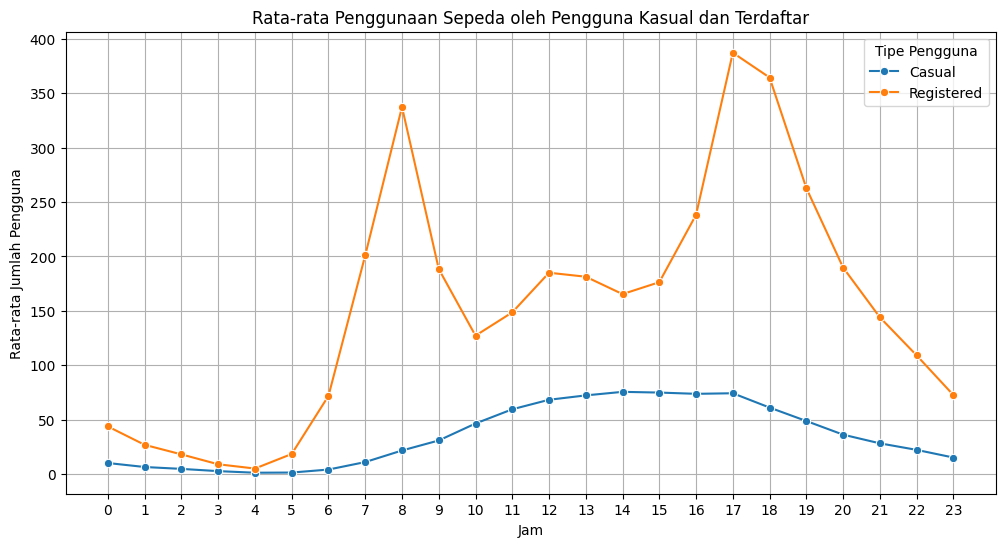

In [33]:
# 2. Analisis Pengguna Kasual vs Terdaftar

# Menghitung rata-rata jumlah peminjaman sepeda berdasarkan tipe pengguna, waktu dalam sehari
hourly_casual_registered = hour_df.groupby('hr')[['casual', 'registered']].mean().reset_index()

# Visualisasi perbedaan penggunaan sepeda antara pengguna kasual dan terdaftar
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_casual_registered, x='hr', y='casual', label='Casual', marker='o')
sns.lineplot(data=hourly_casual_registered, x='hr', y='registered', label='Registered', marker='o')
plt.title('Rata-rata Penggunaan Sepeda oleh Pengguna Kasual dan Terdaftar')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Jumlah Pengguna')
plt.xticks(range(0, 24))
plt.grid(True)
plt.legend(title='Tipe Pengguna')
plt.show()

**Insight:**
- Pengguna terdaftar memiliki puncak penggunaan yang sangat jelas pada pagi hari (jam 8) dan sore hari (jam 17-18), yang konsisten dengan tren komuter yang telah diamati. Mereka lebih mungkin menggunakan sepeda untuk perjalanan rutin seperti ke kantor atau sekolah.
- Pengguna kasual memiliki pola penggunaan yang berbeda, dengan puncak yang lebih tinggi di siang hari (sekitar jam 12-16), dan penggunaan yang jauh lebih rendah di pagi dan sore hari. Hal ini menunjukkan bahwa pengguna kasual lebih cenderung menggunakan sepeda untuk rekreasi atau aktivitas non-komuter.
- Secara keseluruhan, pengguna terdaftar memiliki tingkat penggunaan yang lebih tinggi dibandingkan pengguna kasual, terutama pada jam sibuk pagi dan sore hari.

## Conclusion

- Pertanyaan 1: Bagaimana pengaruh cuaca terhadap jumlah peminjaman sepeda?

  Kondisi cuaca memiliki pengaruh yang signifikan terhadap penggunaan sepeda. Cuaca yang baik (cerah atau berawan ringan) meningkatkan jumlah peminjaman sepeda, sementara cuaca buruk (hujan lebat atau salju) menyebabkan penurunan drastis dalam jumlah pengguna.

  Pengguna lebih cenderung menggunakan sepeda pada kondisi cuaca yang lebih nyaman, yang masuk akal mengingat hujan atau cuaca dingin dapat membuat bersepeda kurang menarik atau bahkan sulit.

- Pertanyaan 2: Apakah ada tren waktu tertentu dalam sehari yang menunjukkan lebih banyak peminjaman sepeda?

  Tren peminjaman meningkat selama jam sibuk, terutama di pagi hari (7-9) dan sore hari (17-19), yang kemungkinan besar berkaitan dengan jam berangkat dan pulang kerja.

  Pada akhir pekan, pola waktu berubah, di mana pengguna cenderung menggunakan sepeda lebih merata sepanjang siang hari (jam 11-16). Ini menunjukkan bahwa pengguna lebih memilih waktu santai untuk bersepeda pada akhir pekan daripada pada waktu sibuk pagi atau sore.